# Data Analysis

## Table of Contents
* [Import Libraries](#chapter1)
    * [Import magic autoreload](#section_1_1)
    * [Import the libraries](#section_1_2)
    * [Import custom functions.](#section_1_3)
* [Data Analysis](#chapter2)
* [Inspect the Data](#chapter3)
* [Create new variables](chapter4)
* [Save the Data](#chapter5)


## Import Libraries: <a class="anchor" id="chapter1"></a>

Import the magic autoreload extension so that any changes in external python modules are automatically loaded. <a class="anchor" id="section_1_1"></a>

In [1]:
# autoreload 2
%load_ext autoreload
%autoreload 2

Import the libraries we will use in this notebook. <a class="anchor" id="section_1_2"></a>

In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

Set the current working directory to the project folder.

In [3]:
os.chdir("C:/Users/migue/OneDrive - NOVAIMS/Data Science/Coding Courses/Machine Learning II/Project")
# wd stands for working directory
wd = os.getcwd()

In [4]:
from functions.funcs import *

Import the data: <a class="anchor" id="section_1_3"></a>

In [5]:
path = wd + "/data/"
for file in os.listdir(path):
    name = file.split(".")[0]
    globals()[name] = pd.read_csv(path + file)
    print(f"Created dataframe {blue}{name}{end} from {file}")

Created dataframe Basket from Basket.csv
Created dataframe Info from Info.csv
Created dataframe Mapping from Mapping.csv


In [6]:
print_cols(Info, 'Info')

Columns in Info are: 
	-customer_id, customer_name, customer_gender, customer_birthdate, kids_home, 
	-teens_home, number_complaints, distinct_stores_visited, lifetime_spend_groceries, lifetime_spend_electronics, 
	-typical_hour, lifetime_spend_vegetables, lifetime_spend_nonalcohol_drinks, lifetime_spend_alcohol_drinks, lifetime_spend_meat, 
	-lifetime_spend_fish, lifetime_spend_hygiene, lifetime_spend_videogames, lifetime_total_distinct_products, percentage_of_products_bought_promotion, 
	-year_first_transaction, loyalty_card_number, latitude, longitude, is_business, 
	-age, lifetime_spent, education_level



# 2. Data Analysis <a class="anchor" id="chapter2"></a>  


First analysis of the customers in the dataset. <br>
We will look at the average lifetime spent of customers separated in groups according to their education level. <br>

In [7]:
from pylab import rcParams
rcParams['figure.figsize'] = 10, 6

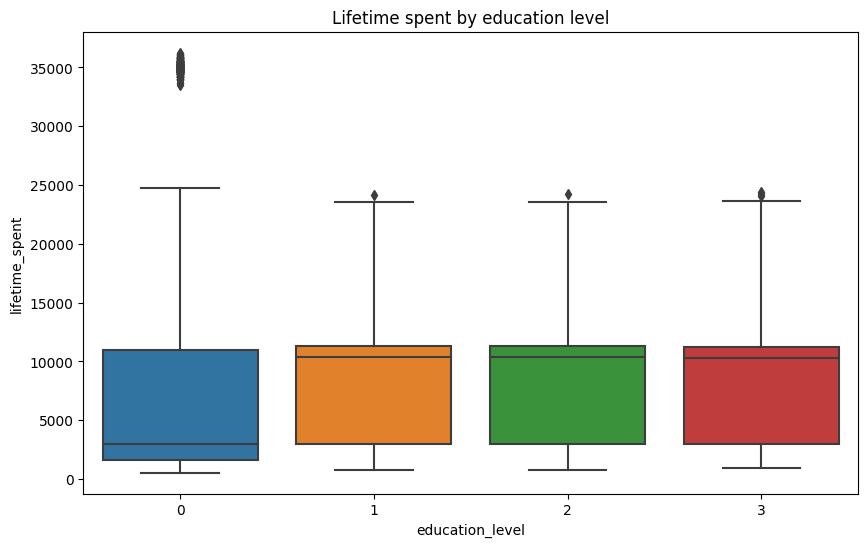

In [8]:
# plot boxplots for lifetime_spent for each group of customers given their education_level
sns.boxplot(x='education_level', y='lifetime_spent', data=Info)
plt.title('Lifetime spent by education level')
plt.show()

In [9]:
Info['customer_gender'].value_counts()

male      15090
female    14910
Name: customer_gender, dtype: int64

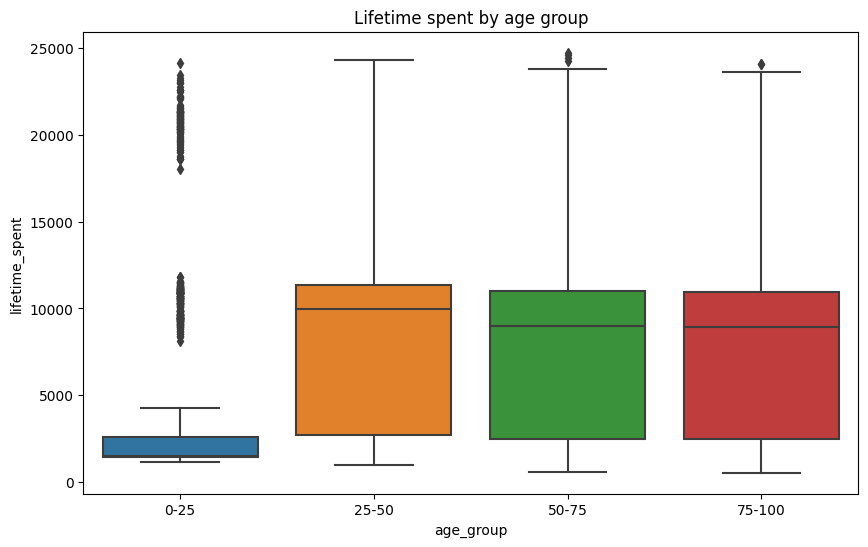

In [12]:
# lets divide age into 4 groups
Info['age_group'] = pd.cut(Info['age'], bins=[0, 25, 50, 75, 100], labels=['0-25', '25-50', '50-75', '75-100'])

# plot boxplots for lifetime_spent for each group of customers given their age_group and excluding supermarkets.
sns.boxplot(x='age_group', y='lifetime_spent', data=Info[Info['is_business'] == 0])
plt.title('Lifetime spent by age group')
plt.show()